# Sliding Window Method

In [1]:
import sys
import matplotlib.pyplot as plt
import pandas as pd
from scipy import interpolate

sys.path.append("../code")
from utils import *

### Generate Data  
Here a few simple signals are created using numpy

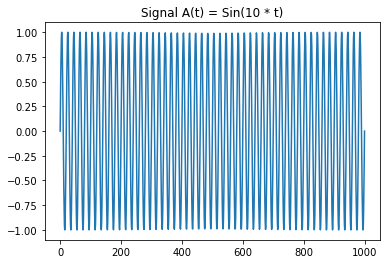

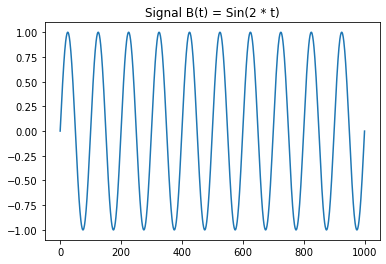

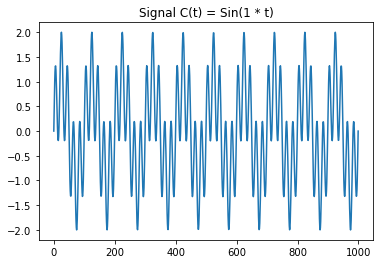

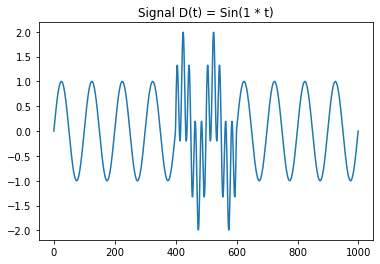

In [2]:
# Data
omega_1 = 10
omega_2 = 2
omega_3 = 1

x = np.linspace(0,10*np.pi,1000)                  # Start, End, Samples between
A = pd.Series([np.sin(omega_1 * t) for t in x])   # Signal A
B = pd.Series([np.sin(omega_2 * t) for t in x])   # Signal B
C = omega_3 * (A + B)                             # Signal C - Superposition of A and B

anomaly = C.iloc[400:600]
D = B.copy()                                      # Signal D - Signal B with Sudden anomaly
D[400:600] = anomaly


signals = [(A, omega_1), (B, omega_2), (C, omega_3), (D, 1)]
titles = ["A", "B", "C", "D"]
x = [i for i in range(len(x))]

# Plot the signals
for idx, (signal, omega) in enumerate(signals):
    plt.plot(x, signal)
    plt.title(f"Signal {titles[idx]}(t) = Sin({omega} * t)")
    plt.show()

## Full Analysis on Signal D

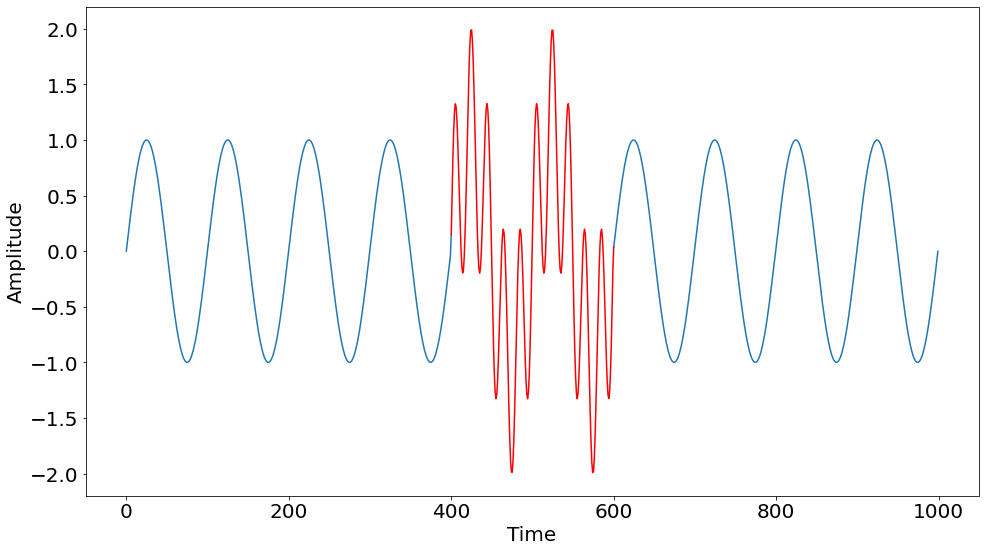

In [3]:
# Plot Signal B
x = [i for i in range(len(D))]

# Mask the anomolous region and plot signal D
masked = np.ma.masked_outside(x, 400,600)
un_masked = np.ma.masked_inside(x, 401,599)
plt.figure(figsize=(16,9))
plt.plot(un_masked,D, linewidth=1.5)
plt.plot(masked,D, c="r", linewidth=1.5)
plt.xlabel("Time", fontsize=20)
plt.ylabel("Amplitude", fontsize=20)
plt.xticks(fontsize= 20)
plt.yticks(fontsize= 20)
plt.ylim(-2.2,2.2)
plt.show()


### Set hyperparameters

In [4]:
# Analysis parameters
analysis_signal = D                 # What signal to analyze 
window_size = 200                   # Sliding Window Size (Dataset need to be atleast twice this size)
divider_range = range(1,50,1)       # Range of divider sizes when calculating fractal dimension
skipping_step = 1                   # To calculate fractal dim for every single datapoint set to 1

### Run the Analysis

In [5]:
analysis_results = fractal_analysis(analysis_signal, divider_range, window_size, skipping_step)

Fractal Analysis Distance Covered: 100%|████████████████████| 800/800 [00:32<00:00, 24.60it/s]


### Plot the Results

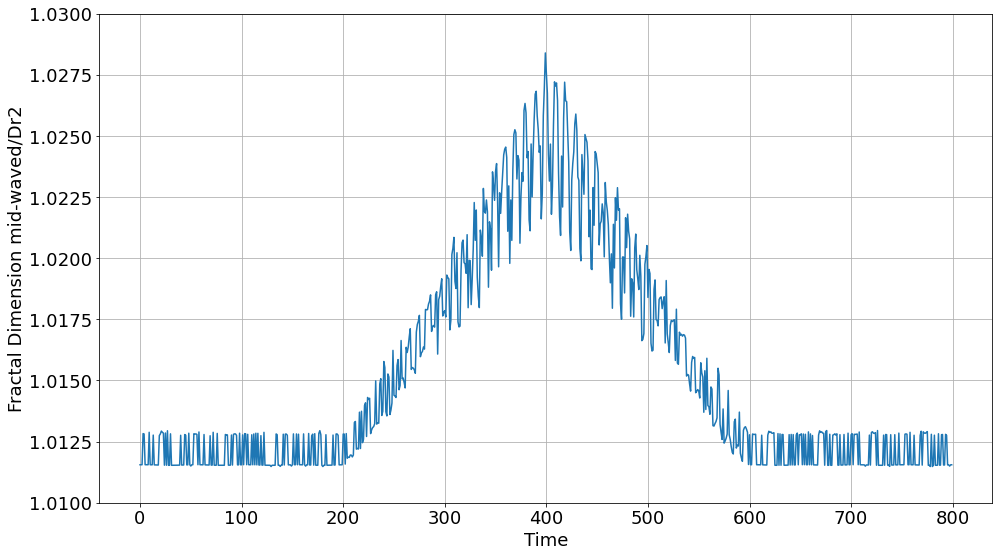

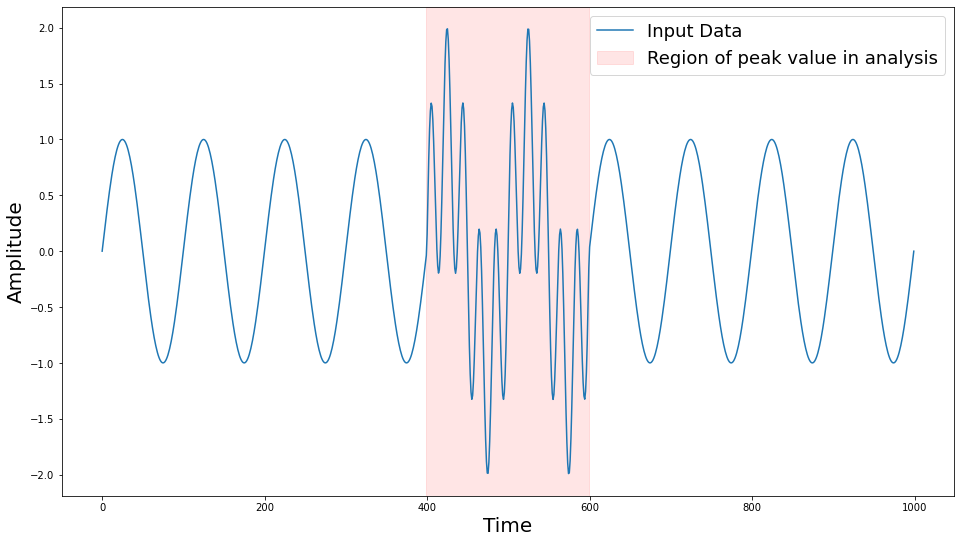

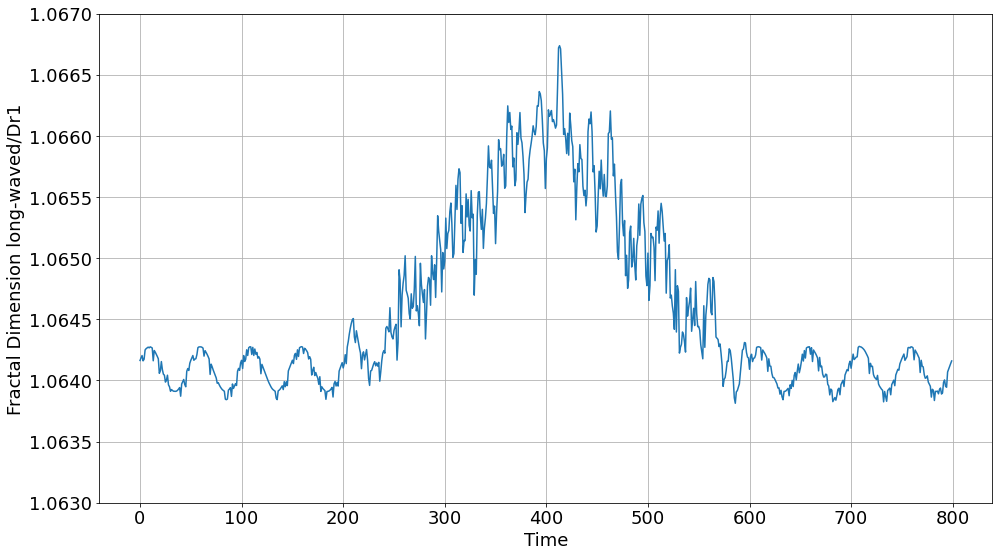

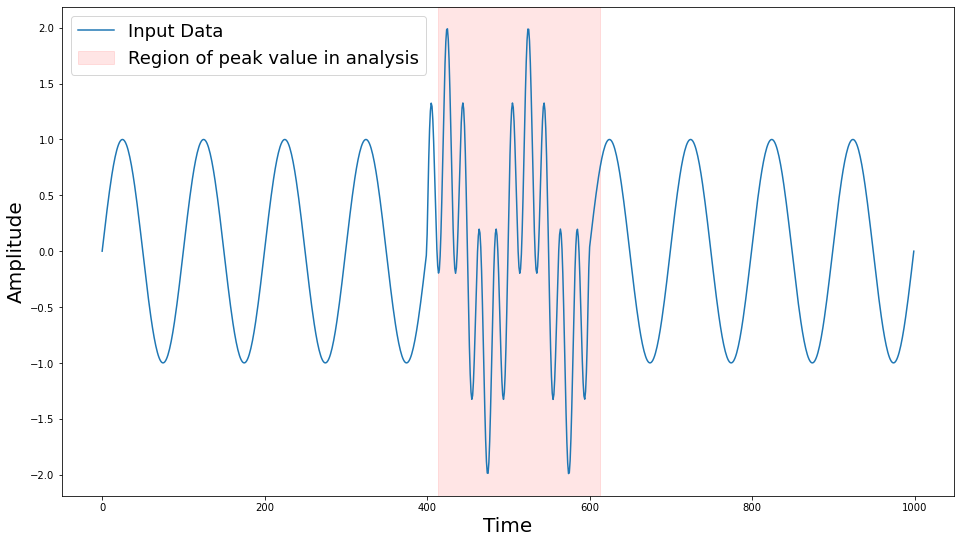

In [6]:
# Get the results
position, long_waved, mid_waved = zip(*analysis_results)

# Mid waved plots
plt.figure(figsize=(16,9))
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.plot(position, mid_waved)
plt.xlabel("Time", fontsize=18)
plt.ylabel("Fractal Dimension mid-waved/Dr2", fontsize=18)
plt.ylim(1.01,1.03)
plt.grid()
plt.show()

plt.figure(figsize=(16,9))
plt.plot(x[:len(mid_waved)*skipping_step*2], analysis_signal[:len(mid_waved)*skipping_step*2], label="Input Data")
plt.axvspan(np.argmax(mid_waved)*skipping_step, skipping_step*(np.argmax(mid_waved)+window_size), color="r", alpha=0.1, label=f"Region of peak value in analysis")
plt.legend(fontsize=18)
plt.xlabel("Time", fontsize=20)
plt.ylabel("Amplitude", fontsize=20)
plt.show()


# Long waved plots
plt.figure(figsize=(16,9))
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.plot(position, long_waved)
plt.xlabel("Time", fontsize=18)
plt.ylabel("Fractal Dimension long-waved/Dr1", fontsize=18)
plt.grid()
plt.ylim(1.063,1.067)
plt.show()

plt.figure(figsize=(16,9))
plt.plot(x[:len(long_waved)*skipping_step*2], analysis_signal[:len(long_waved)*skipping_step*2], label="Input Data")
plt.axvspan(np.argmax(long_waved)*skipping_step, skipping_step*(np.argmax(long_waved)+window_size), color="r", alpha=0.1, label=f"Region of peak value in analysis")
plt.legend(fontsize=18)
plt.xlabel("Time", fontsize=20)
plt.ylabel("Amplitude", fontsize=20)
plt.show()
